In [4]:
%run GUIanaliza.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

plt.rcParams['figure.figsize'] = (15, 5) # Nastavitev velikosti grafon
pd.options.display.max_rows = 8 # Nastavitev maks. št. prikazanih vrstic v tabeli

## 2.) del: Analiza izbrane države

V drugem delu analize mora uporabnik sam izbrati državo, ki jo želi analizirati. Nato vnese še izbrani mesec in temperaturo. S tem programom nato lahko poišče mesto, ki ima v izbranem mesecu temperaturo najbližjo vnešeni. Najprej prosim zaženi spodnjo funkcijo: <br />

OPOMBA: Pri večjih državah je lahko potrebno čakati precej časa, da program prenese vse potrebne podatke.

In [5]:
izbrani_mesec, ime_datotekeOsn, ime_datotekeRaz = zazeni_analizaGUI()


    izbrana drzava: Hungary 

    izbrani mesec: maj 

    izbrana temperatura: 10°C 

    


Spodaj je prikazana osnovna tabela s podatki o temperaturah za posamezno mesto.

In [6]:
osnovni_df = pd.read_csv(ime_datotekeOsn, encoding='latin1', index_col='MESTO')
razlikaTemperatur_df = pd.read_csv(ime_datotekeRaz, encoding='latin1',index_col='MESTO')
priporoceni_df = pd.read_csv("priporoceni.txt", encoding='latin1',index_col='Mesto')

In [7]:
osnovni_df[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Adyliget,Hungary,128400,-1.1,0.0,5.0,10.6,16.7,20.0,21.7,20.6,15.6,10.6,5.0,0.0,10.0
Budapest,Hungary,93821,-0.6,1.1,6.1,10.6,15.6,18.9,20.6,20.6,16.7,10.6,3.9,1.1,10.0
Debrecen,Hungary,28821,-1.7,0.6,6.1,10.6,15.6,18.3,20.6,20.0,16.7,10.6,3.9,0.6,10.0
Deszk,Hungary,129820,-1.1,0.0,5.0,10.6,15.6,18.9,20.6,20.0,15.6,10.6,5.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szeged,Hungary,28921,-0.6,0.6,6.1,11.7,16.7,18.9,21.1,20.6,17.2,11.7,4.4,1.1,10.0
Szolnok,Hungary,6821,-1.1,0.6,6.7,11.1,16.1,18.9,21.1,20.6,17.2,11.1,4.4,1.1,10.0
Szombathely,Hungary,21821,-0.6,0.6,5.6,9.4,14.4,17.2,19.4,19.4,15.6,10.0,3.9,1.1,9.0
Zok,Hungary,592816,-0.6,1.1,6.7,10.6,15.6,18.9,20.6,20.6,17.8,11.7,5.0,1.7,10.0


V spodnji tabeli so podatki o temperaturah za izbrani mesec. V stolpcu z imenom "razlika od vnosa" pa se nahajajo vrednosti, ki povedo, za koliko se vnešena temperatura v tem mesecu razlikuje od dejanske. Mesta so urejena naraščajoče po zadnjih vrednostih.

In [8]:
mesec_df = razlikaTemperatur_df[[izbrani_mesec, 'razlika od vnosa','izbrana temperatura']]
razvrsceni_df = mesec_df.sort_values('razlika od vnosa', ascending=True)
razvrsceni_df[:][[izbrani_mesec, 'razlika od vnosa']]

,maj,razlika od vnosa
MESTO,,
Miskolc,13.9,3.9
Nagykanizsa,14.4,4.4
Szombathely,14.4,4.4
Megyeri Puszta,15.0,5.0
...,...,...
Siofok,16.1,6.1
Szolnok,16.1,6.1
Szeged,16.7,6.7
Adyliget,16.7,6.7


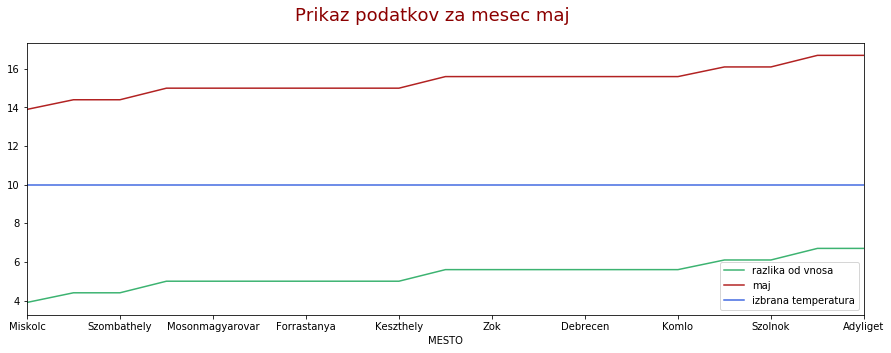

In [9]:
t1 = razvrsceni_df['razlika od vnosa']
t1.colums = ['razlika od vnosa']
t2 = razvrsceni_df[izbrani_mesec]
t2.colums = [izbrani_mesec]
t3 = razvrsceni_df['izbrana temperatura']
t3.colums = ['izbrana temperatura']
zdruzi = pd.concat([t1, t2, t3], axis =1)
zdruzi.plot(color=['mediumseagreen','firebrick','royalblue'])
plt.suptitle('Prikaz podatkov za mesec ' + izbrani_mesec, fontsize=18,color='darkred')
plt.show()

Spodaj je zapisana tabela s podatki, za tri mesta, ki se v izbrani drzavi najbolj priblizajo vašim želenim podatkom.

In [10]:
najblizji3_cela = razlikaTemperatur_df.sort_values('razlika od vnosa', ascending=True)[:3]
najblizji3_cela[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE,razlika od vnosa,izbrana temperatura
MESTO,,,,,,,,,,,,,,,,,
Miskolc,Hungary,27721,-2.8,-3.3,2.8,9.4,13.9,18.9,20.0,20.0,15.6,10.0,3.9,1.1,9.0,3.9,10
Nagykanizsa,Hungary,52921,-0.6,1.1,6.1,10.0,14.4,17.8,19.4,18.9,15.6,10.0,4.4,1.1,9.0,4.4,10
Szombathely,Hungary,21821,-0.6,0.6,5.6,9.4,14.4,17.2,19.4,19.4,15.6,10.0,3.9,1.1,9.0,4.4,10


Ker se verjetno v večini mest vaša izbrana temperatura kar precej razlikuje od dejanske, vam želim priporočiti boljši vnos podatkov. Če želiš najti mesta v katerih se temperatura od vaše trenutno izbrane razlikuja za manj kot 1°C, vam svetujem, da vnesete enaga izmed mesecoev v spodnji tabeli.

In [11]:
priporoceni_df[:]

,mesec
Mesto,
Forrastanya,julij
Forrastanya,julijmaj
Nagykanizsa,julij
Nagykanizsa,julijmaj
...,...
Gyor,julij
Miskolc,maj
Szombathely,maj
Megyeri Puszta,julij


Spodnji graf prikazuje kolikšen delež mest s podobno temperaturo boste našli v posameznem mesecu. Če meseca ni na grafu, potem se v tem mesecu temperatura v nobenem mestu dovolj ne približa izbrani temperaturi.

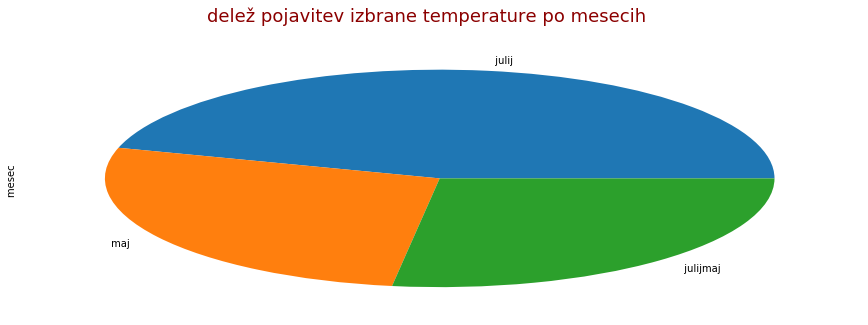

In [12]:
st = priporoceni_df['mesec '].value_counts().plot(kind='pie')
plt.suptitle('delež pojavitev izbrane temperature po mesecih', fontsize=18,color='darkred')
plt.show()